In [1]:
import numpy as np
import math 
from numpy.linalg import norm
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [20]:
def newvect(P):
    v = np.zeros(9)
    for i in range(3):
        for j in range(3):
            v[3*j+i] = P[i,j]
    return v

#Compute adjacency indices
def I_Dnorm():
    Dict = []
    for i in range(3):
        for j in range(3):
            for k in range(3):
                for l in range(3):
                    if (abs(i -k) + abs(j-l) <= 1):
                        Dict.append((i,j,k,l))
    return Dict

# Compute D-norm of a 3 by 3 array
def computevectDnorm(P):
    sum=0
    Dvect = I_Dnorm()
    for x in Dvect:
        sum+= (P[x[0], x[1]] - P[x[2],x[3]])**2
    return np.sqrt(0.5*sum)

def computeDnorm(P):
    n, m = P.shape
    norm_vect = np.zeros((n,1))
    for i in range(n):
        norm_vect[i,0] = np.sqrt(computevectDnorm(P[i].reshape(3,3)))
    return norm_vect

def merge_Dnorm_list(P):

    B = computeDnorm(P)
    C = list(zip(list(P), list(B)))
    C.sort(key = lambda x:x[1], reverse = True)
    return list(zip(*C))[0]



def sort_list(C, D):
    
    patch_merge_list = C.extend(D)

    patch_merge_list.sort(key = lambda x:x[1], reverse = True)

    return patch_merge_list


In [2]:
import pickle
import math
with open('patches0_:5_heat.pckl', 'rb') as handle:
    Q= pickle.load(handle)

with open('patches5_:10_heat.pckl', 'rb') as handle:
    P= pickle.load(handle)



In [3]:
Q = list(Q)
P = list (P)
Q.extend(P)

Q.sort(key = lambda x:x[1], reverse = True)

heat_sort = Q[0:1000000]

#outfilez = open('heat-sort_patches01.pckl', 'wb')
#pickle.dump(heat_sort, outfilez)
#outfilez.close() 


#B = list(zip(*Q[0:2000000]))[0]

In [4]:
heat_sort[0]

(array([84., 85., 82., 84., 86., 82., 84., 86., 83.], dtype=float32), 255.0)

In [4]:
outfilez = open('heat-sort_patches01.pckl', 'wb')
pickle.dump(list(B), outfilez)
outfilez.close() 

: 

: 

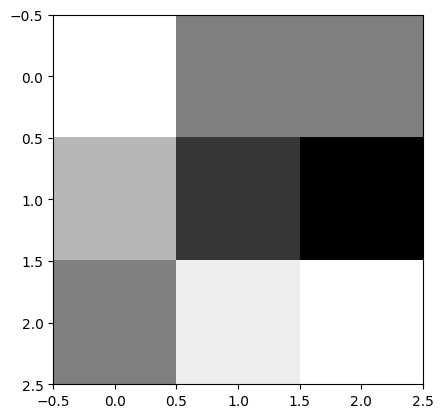

In [7]:
plt.imshow(B[0].reshape(3,3))
plt.gray()

In [5]:
n = math.floor(len(P)/400000)
for i in range(n):
    
    Q1 = list(Q)
    P1 = list(P[400000*i:(400000*(i+1))])
    Q1.extend(P1)
    Q1 = np.unique(np.asarray(Q1), axis =0)
    d_sort = merge_Dnorm_list(Q1)[0:2000000]

    Q = d_sort

Q1 = list(Q)
P1 = list(P[400000*n:])
Q1.extend(P1)
Q1 = np.unique(np.asarray(Q1), axis =0)
d_sort = merge_Dnorm_list(Q1)[0:2000000]


outfilez = open('D-sort_patches08.pckl', 'wb')
pickle.dump(d_sort, outfilez)
outfilez.close() 



In [15]:
import pickle
import numpy as np
import math
with open('patches0_:3_2_1.pckl', 'rb') as handle:
    Q= pickle.load(handle)


In [9]:
Q.sort(key = lambda x:x[1], reverse = False)

B = list(zip(*Q[0:math.ceil(100/100*len(Q))]))[0]


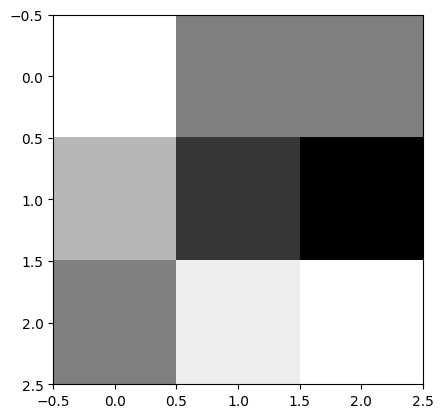

In [11]:
plt.imshow(B[0].reshape(3,3))
plt.gray()

In [136]:
#Q = np.asarray(Q)
A =list(Q[0:40*10**4])
A = np.asarray(A)
P= A[np.random.randint(A.shape[0], size=5*10**4), :]
#P = A

In [137]:
import numpy as np
from sklearn.neighbors import KDTree

def dense_sort_data(k, perc):
    #P = np.asarray(Q[0:math.ceil(30/100*len(Q))])

    tree = KDTree(P, leaf_size =80)
    dist, ind = tree.query(P, k)

    data_sort = list(zip(list(P), dist[:,k-1]))
    len_data = len(data_sort)

    data_sort.sort(key = lambda x:x[1], reverse = False)

    B = list(zip(*data_sort[0:math.ceil(perc/100*len_data)]))[0]

    return np.asarray(B)


In [138]:
d_sort1 = dense_sort_data(50, 20)

#outfilez = open('30_density_D-sort_patches0_:150_3.pckl', 'wb')
#pickle.dump(d_sort, outfilez)
#outfilez.close() 

In [17]:
import math
#Y = list(d_sort1)
#Q = list(zip(*list(Q)))[0]
Y = list(Q[0:math.ceil(2/100*len(Q))])
# data: 200k, 300k, k=30, p = 20; 400k, 50, 20; 500k, 50, 20; 700k, 30,20; 50, 20; 80, 20
# data: 800k, 50, 20

array([80., 92., 81., 83., 84., 85., 83., 84., 86.], dtype=float32)

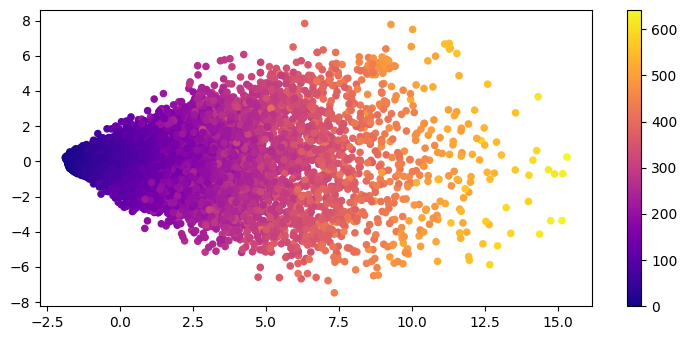

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from numpy.linalg import norm
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True


pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(Y)
y = norm(Y, axis=1)


f, ax = plt.subplots()

points = ax.scatter(Xt[:,0], Xt[:,1], c=y, s=20, cmap="plasma")
f.colorbar(points)

#plt.savefig("data_2d.jpg")
plt.show()


In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from numpy.linalg import norm
import math
import plotly.express as px
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt



pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(Y)


fig = px.scatter_3d(None, 
                    x=Xt[:,0], y=Xt[:,1], z=Xt[:,2],
                    color=list(norm(Y, axis= 1)),
                    height=900, width=900
                   )

# Update chart looks
fig.update_layout(#title_text="Scatter 3D Plot",
                  showlegend=True,
                  legend=dict(orientation="h", yanchor="top", y=0, xanchor="center", x=0.5),
                  scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                        center=dict(x=0, y=0, z=-0.2),
                                        eye=dict(x=-1.5, y=1.5, z=0.5)),
                                        margin=dict(l=0, r=0, b=0, t=0),
                  scene = dict(xaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                         ),
                               yaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                          ),
                               zaxis=dict(backgroundcolor='lightgrey',
                                          color='black', 
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                         )))

# Update marker size
fig.update_traces(marker=dict(size=2))


fig.show()

#fig.write_image("data_3d.jpeg")
#plt.savefig("dense_sub", dpi = 150)



In [8]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import math
from sklearn.manifold import Isomap
from numpy.linalg import norm
from ripser import ripser
from persim import plot_diagrams
import warnings
warnings.filterwarnings('ignore')

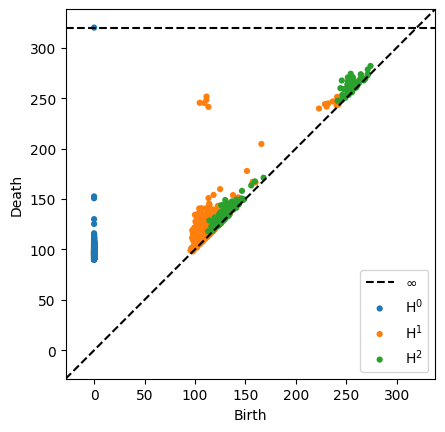

In [148]:
ripser_out_z2 = ripser(d_sort1, coeff=2, do_cocycles = True, maxdim = 2, n_perm = 500)
dgmsz2 = ripser_out_z2['dgms']
plot_diagrams(dgmsz2, labels = ["$H^0$", "$H^1$", "$H^2$", "$H^3$"])
#plt.title("$\beta_1 = 5$")
plt.savefig("data_diag.png")

In [145]:
A = list(dgmsz2[1])
A.sort(key = lambda x:x[1]-x[0], reverse = True)

In [146]:
A[:20]

[array([104.7091217 , 245.42208862]),
 array([111.47645569, 251.63664246]),
 array([111.41364288, 248.36264038]),
 array([109.35721588, 245.16729736]),
 array([113.37548065, 241.42907715]),
 array([165.9186554 , 204.62159729]),
 array([113.41516876, 150.88737488]),
 array([104.21611786, 140.62716675]),
 array([118.5031662 , 154.11683655]),
 array([124.97599792, 159.79675293]),
 array([100.01000214, 134.40237427]),
 array([106.54576111, 140.61650085]),
 array([106.55046082, 140.58804321]),
 array([107.03270721, 140.30323792]),
 array([107.0140152 , 140.21768188]),
 array([104.6709137 , 137.42269897]),
 array([103.45530701, 135.46955872]),
 array([114.08330536, 145.36505127]),
 array([101.50862122, 132.3102417 ]),
 array([110.79711151, 140.69825745])]